In [ ]:
'''10.2)
Use Iris flower dataset and perform following operations. Scan the dataset and give the inference as: 
1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Compare distributions and identify outliers.
'''


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize  # Import winsorize function

In [4]:
# Load the Iris dataset
dataset = "iris.csv"
iris_df = pd.read_csv(dataset)

In [5]:
# Display the first few rows of the dataset
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
# List down the features and their types
# Assuming 'species' is the target variable
features = iris_df.columns[:-1]
feature_types = ['numeric'] * len(features)  # Assume all are numeric for simplicity


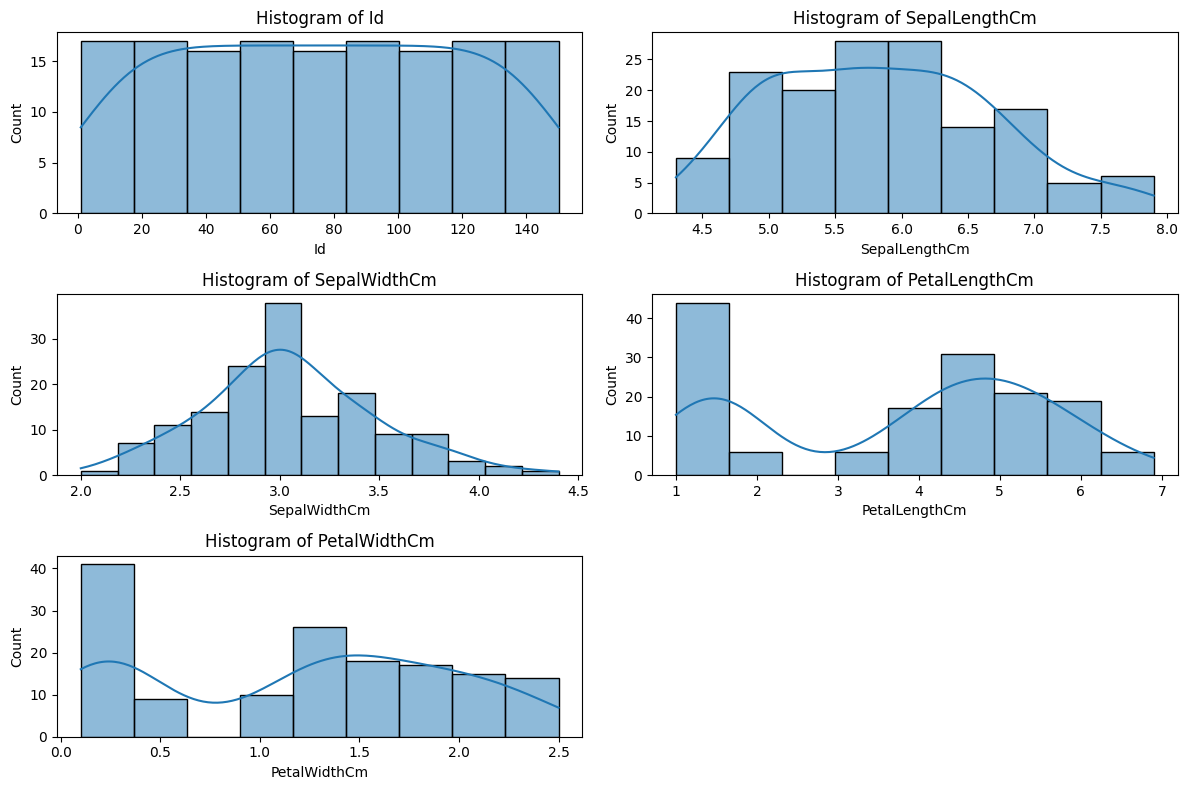

In [8]:
# Create histograms for each feature
num_features = len(features)
num_cols = 2
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(iris_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

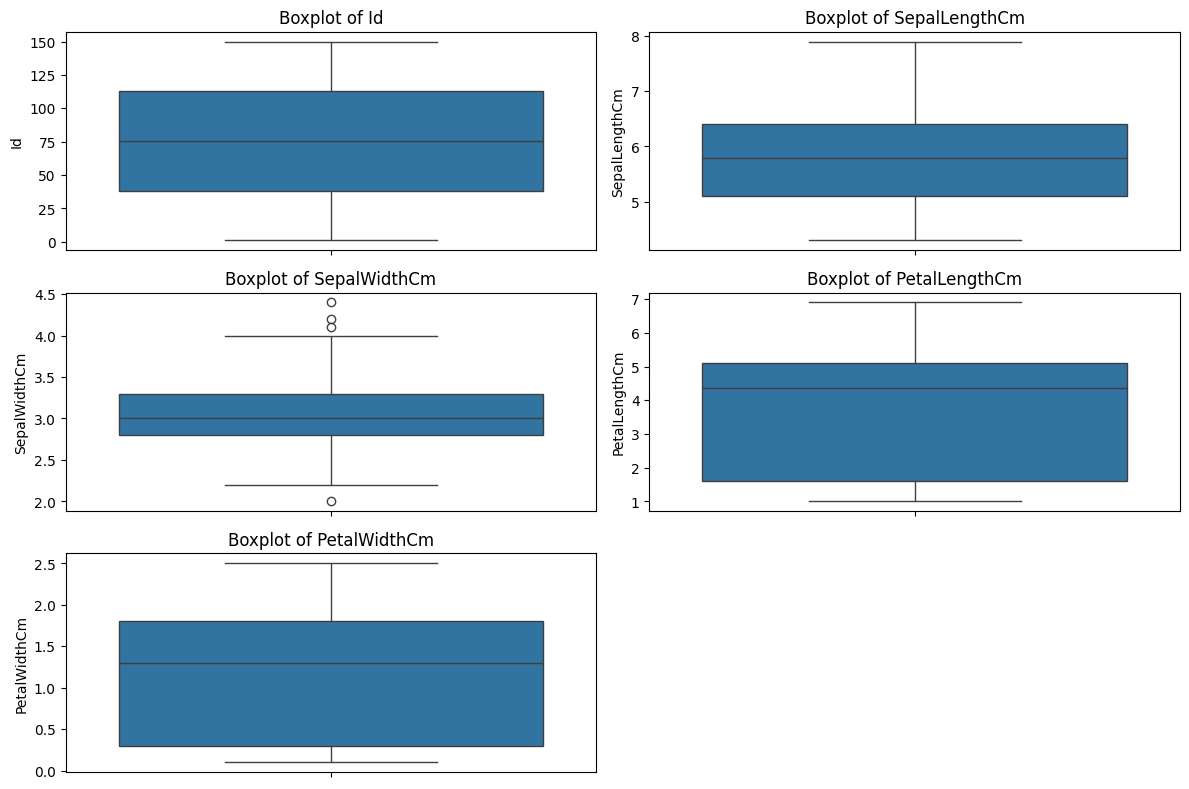

In [10]:
# Create boxplots for each feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=iris_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

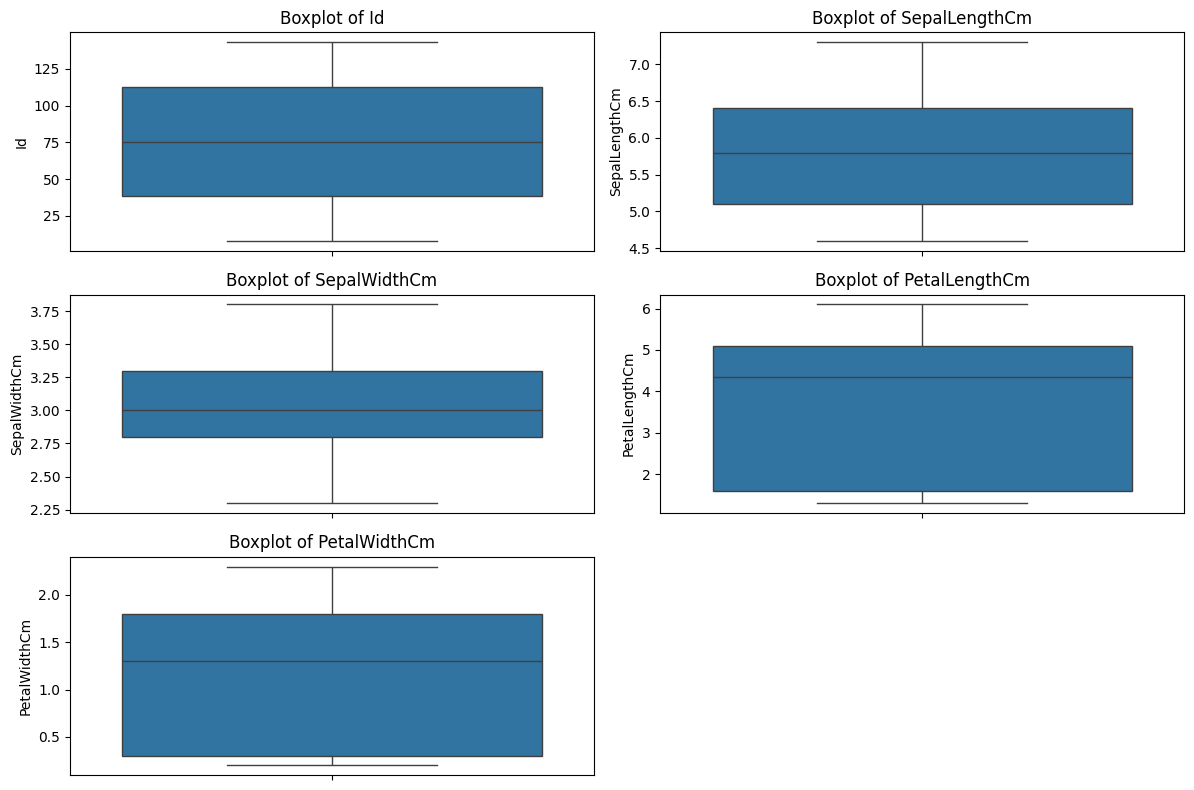

In [15]:
# Handle outliers using winsorization
alpha = 0.05  # Set the winsorization threshold
for feature in features:
    iris_df[feature] = winsorize(iris_df[feature], limits=(alpha, alpha))

# Create boxplots again after handling outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=iris_df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()